In [16]:
# from matplotlib import pyplot as plt
import numpy as np
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import exp_set_dict_warm_order, exp_set_dict_wind_order

In [17]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fda)

<module 'Functions_data_analysis' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_data_analysis.py'>

In [20]:
# Configure data and plotting options

exp_set = 'ic_1995'
exp_set_dict = exp_set_dict_warm_order
# exp_set_dict = exp_set_dict_wind_order
region = 'AS_near'
# region = 'full_model_domain'
depth = -500

# time_mean = 'all' #whether to average over all 5years or over a specific year as a string
time_mean = '1999'  #use 2005 for 5th year of ic_2001, use 1999 for ic_1995. searches times for this year (not dependent on index)
month_start_idx = 47
n_months = 12 # if month_start_idx is not given, uses first n months

ic_str = exp_set.split('_')[-1]

runs = exp_set_dict[exp_set]
runs

['run_forc_erai_1982_rep_ic_1995',
 'run_forc_erai_1984_rep_ic_1995',
 'run_forc_erai_1989_rep_ic_1995',
 'run_forc_erai_1992_rep_ic_1995',
 'run_forc_erai_1994_rep_ic_1995',
 'run_forc_erai_2003_rep_ic_1995',
 'run_forc_erai_2009_rep_ic_1995',
 'run_forc_erai_2011_rep_ic_1995',
 'run_forc_erai_2015_rep_ic_1995',
 'run_forc_erai_1991_rep_ic_1995']

In [21]:
# Load datasets as an ensemble (takes a few minutes for 3d vars)
# To do: change it so that it only loads the specified level

# Ocean T, U, and V
prefix = 'state_3d_set2' # To plot ocean T, U, or V at a given depth

all_run_t_da = fda.get_ensemble_data_for_ic('T', runs, region, prefix, month_start_idx = month_start_idx, n_months=n_months) 
all_run_u_da = fda.get_ensemble_data_for_ic('U', runs, region, prefix,  month_start_idx = month_start_idx, n_months=n_months)
all_run_v_da = fda.get_ensemble_data_for_ic('V', runs, region, prefix, month_start_idx = month_start_idx, n_months=n_months)




Getting T data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(1999, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 11, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 12, 1, 0, 0, 0, 0, has_year_zero=True)]
(12, 70, 254, 300)
lat shape, data lat shape: 253 70
lon shape, data lon shape: 299 254
1
(12, 70, 254, 300)
2
(12, 

ValueError: different number of dimensions on data and dims: 5 vs 4

In [19]:
# Average data and ensemble mean over specified time or over all times


# Select times to average over (but don't avg yet)
if time_mean == 'all':

    T_ens_data = all_run_t_da
    U_ens_data = all_run_u_da
    V_ens_data = all_run_v_da
    
else:
    T_ens_data = all_run_t_da.sel(time=time_mean)
    U_ens_data = all_run_u_da.sel(time=time_mean)
    V_ens_data = all_run_v_da.sel(time=time_mean)

# Get ensemble mean avgs
# Ens mean
T_em = all_run_t_da.mean(dim = 'run')
T_em_time_avg = T_em.mean(dim = 'time')

# Avg U velocities
U_em = all_run_u_da.mean(dim = 'run')
U_em_time_avg = U_em.mean(dim = 'time')

# Avg V velocities
V_em = all_run_v_da.mean(dim = 'run')
V_em_time_avg = V_em.mean(dim = 'time')

# Calculate ensemble data as anomalies relative to the EM

# For annual means:
T_anom_am = T_ens_data.mean(dim='time') - T_em_time_avg
U_anom_am = U_ens_data.mean(dim='time') - U_em_time_avg
V_anom_am = V_ens_data.mean(dim='time') - V_em_time_avg



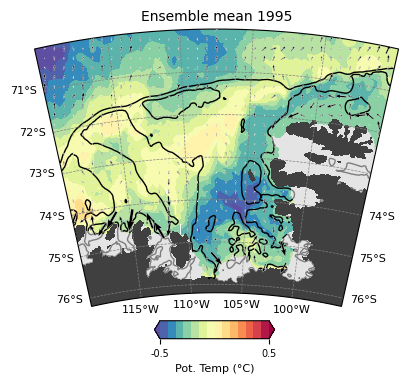

In [20]:
# Plot the first ensemble member 
T_anom_levs = np.linspace(-0.5,0.5,15)
fp.make_contour_map('T', T_anom_am[0], T_anom_levs, 'Spectral_r', region, title='Ensemble mean '+ic_str, save = None,\
                    data_x = U_anom_am[0], data_y = V_anom_am[0])

Saving figure as Plots/Maps/Figure_EM_0m_vel_map_ic_1995.png


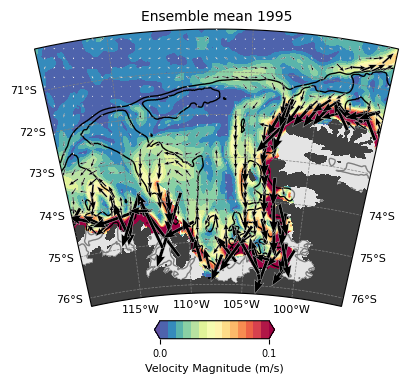

In [18]:
# Plot EM vector magnitudes in colors raather than T
figname='Plots/Maps/Figure_EM_'+str(depth)+'m_vel_map_ic_1995.png'
# figname=None
mag_levs = np.linspace(0,.1,15)
mag = (U_em_time_avg ** 2 + V_em_time_avg ** 2) ** 0.5
fp.make_contour_map('mag', mag, mag_levs, 'Spectral_r', region, title='Ensemble mean '+ic_str, save = figname,\
                data_x = U_em_time_avg, data_y = V_em_time_avg)

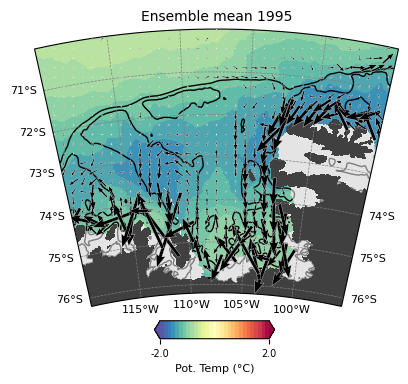

In [24]:
# Plot Temp EM and vectors on top
importlib.reload(fp)

# Set up contour levels 
if depth == 0:
    T_em_levs = np.linspace(-2,2,30)
else:
    T_em_levs = np.linspace(0,2,15)

# figname = 'Plots/Maps/Figure_EM_quiv_map_ic_'+exp_set+'.png'
figname=None
fp.make_contour_map('T', T_em_time_avg, T_em_levs, 'Spectral_r', region, title='Ensemble mean '+ic_str, save = figname,\
                data_x = U_em_time_avg, data_y = V_em_time_avg)



In [22]:
T_em_time_avg

<xarray.DataArray (lat: 254, lon: 300)>
array([[-0.7469828 , -0.7440712 , -0.73889947, ..., -1.1448935 ,
        -1.147009  , -1.1474639 ],
       [-0.74940795, -0.7467992 , -0.7414164 , ..., -1.1468852 ,
        -1.1505138 , -1.1531492 ],
       [-0.75120753, -0.748908  , -0.7447993 , ..., -1.1497422 ,
        -1.1546634 , -1.1573659 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)
Coordinates:
  * lat      (lat) >f4 -70.01 -70.04 -70.06 -70.09 ... -76.15 -76.18 -76.2
  * lon      (lon) >f4 -120.0 -119.9 -119.8 -119.7 ... -95.21 -95.12 -95.04

0
1
2
3
4
5
6
7
8
9
Saving figure as Plots/Maps/Figure_ens_-400m_vel_anom_quiv_maps_ic_1995.png


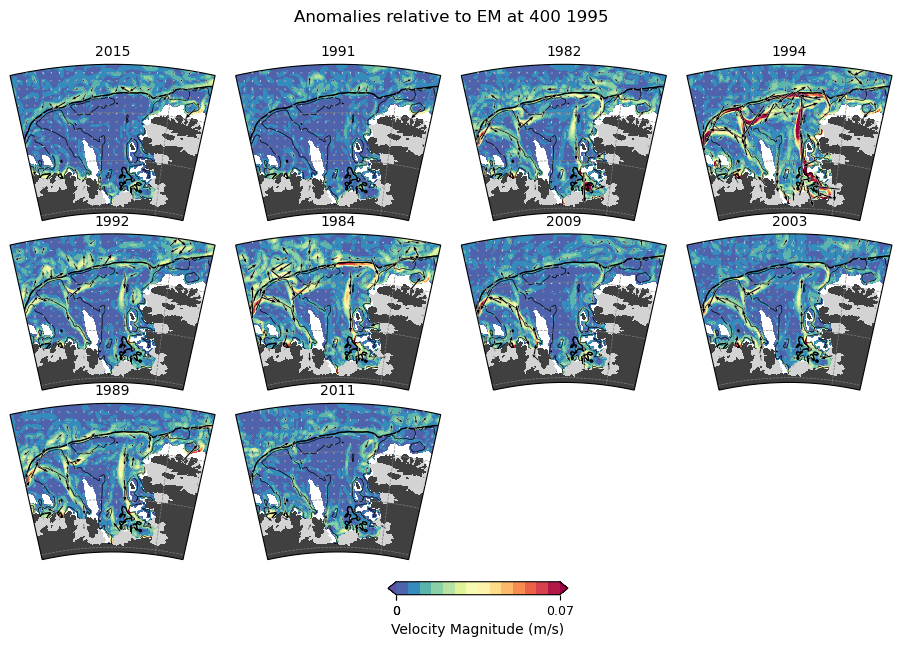

In [9]:
# importlib.reload(fp)

# Plot Temp all members

T_anom_levs = np.linspace(-1,1,15)
U_anom_levs = np.linspace(-.01,.01,15)
title = 'Anomalies relative to EM at '+str(depth)+'m depth, '+ic_str

figname = 'Plots/Maps/Figure_ens_'+str(depth)+'m_vel_anom_quiv_maps_'+exp_set+'.png'
# figname = None


mag_levs = np.linspace(0,.07,15)
mag = (U_anom_am ** 2 + V_anom_am ** 2) ** 0.5

fp.make_ensemble_subplots('mag',mag, mag_levs,'Spectral_r',region,title,\
                          save=figname, data_x = U_anom_am, data_y = V_anom_am)


In [ ]:
# Plot U EM

# Set up contour levels 
U_em_levs = np.linspace(-0.05,0.05,11)

fp.make_contour_map('U', U_time_avg_mean, U_em_levs, 'viridis',region,title='Ensemble mean, IC '+ic_str,save=None)

# Uncomment to save
figname = 'Plots/Figure_U_EM_map_ic_'+exp_set+'.png'
# fp.make_contour_map('U', U_time_avg_mean, U_em_levs, 'viridis', region,title='Ensemble mean '+ic_str, save=figname)



0
1
2
3
4
5
6
7
8
9


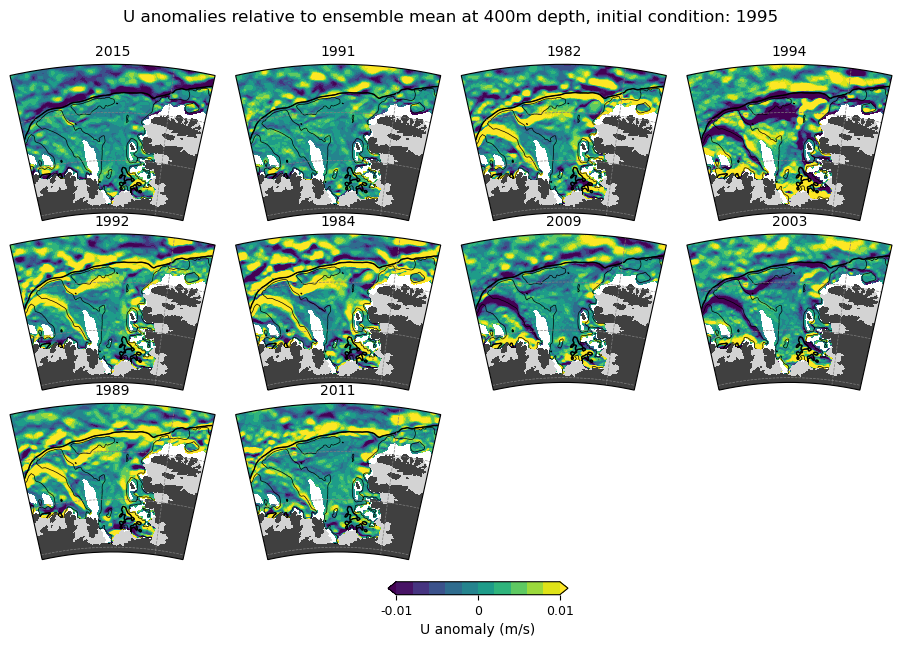

In [19]:
# Plot U all members

U_anom_levs = np.linspace(-0.01,0.01,11)

fp.make_ensemble_subplots('U', U_time_avg_mean, U_ens_data, U_em_levs, U_anom_levs,'viridis',region,save=None, depth = depth)

figname = 'Plots/Figure_U_maps_ic_'+exp_set+'.png'
# fp.make_ensemble_subplots('U', U_time_avg_mean, U_ens_data, U_em_levs, U_anom_levs, 'viridis', region, depth = depth, save=figname)


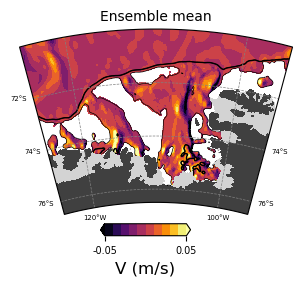

In [11]:
# Plot V EM

# Set up contour levels 
V_em_levs = np.linspace(-0.05,0.05,11)

fp.make_contour_map('V', V_time_avg_mean, V_em_levs, 'inferno', region,title='Ensemble mean '+ic_str, save=None)

# Uncomment to save
figname = 'Plots/Figure_V_EM_map_ic_'+exp_set+'.png'
# fp.make_contour_map('V', V_time_avg_mean, V_em_levs, 'inferno', region,title='Ensemble mean '+ic_str, save=figname)



0
1
2
3
4
5
6
7
8
9


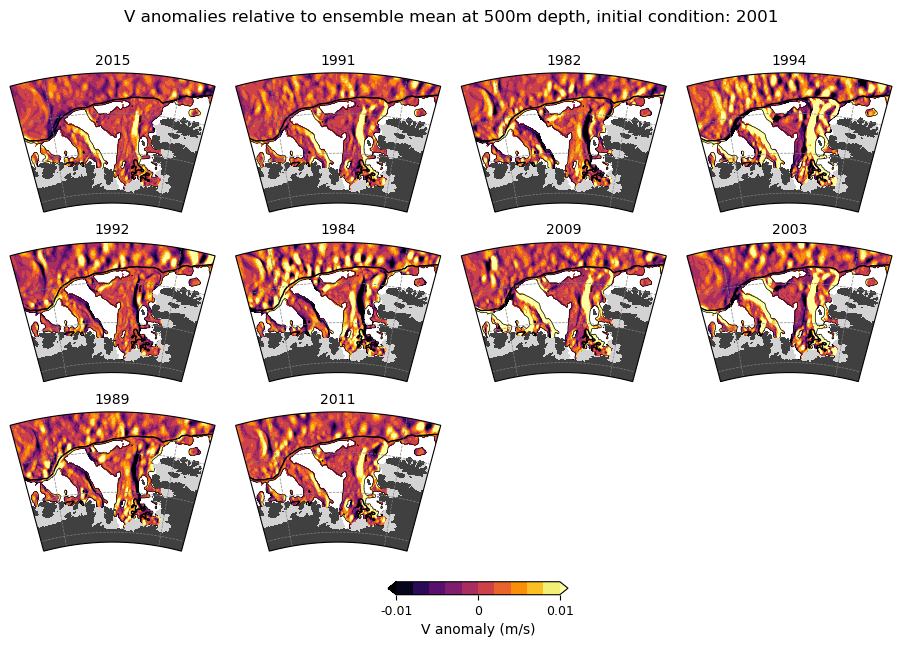

In [12]:
# Plot V all members

V_anom_levs = np.linspace(-0.01,0.01,11)

fp.make_ensemble_subplots('V', V_time_avg_mean, V_ens_data, V_em_levs, V_anom_levs, 'inferno', region, save = None, depth = depth)

figname = 'Plots/Figure_V_maps_ic_'+exp_set+'.png'
# fp.make_ensemble_subplots('V', V_time_avg_mean, V_ens_data, V_em_levs, V_anom_levs,'inferno',region, depth = depth, save=figname)